In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Ad Click Prediction.ipynb',
 'Digit Recognition.ipynb',
 'Heart Disease Prediction.ipynb',
 'Iris.csv',
 'Iris.ipynb']

# Loading Data

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.shape

(150, 6)

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.drop(['Id'],inplace=True,axis=1)

In [9]:
data.columns = data.columns.str.lower()
data.rename(columns={'sepallengthcm':'slength','sepalwidthcm':'swidth','petallengthcm':'plength','petalwidthcm':'pwidth'},inplace=True)
data['species'] = data['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data.head()

,slength,swidth,plength,pwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data_column = data.select_dtypes(include=['float64'])
data.species.unique()

array([0, 1, 2], dtype=int64)

# Data Vizualising

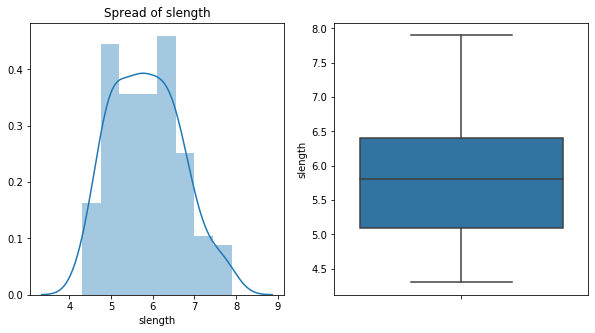

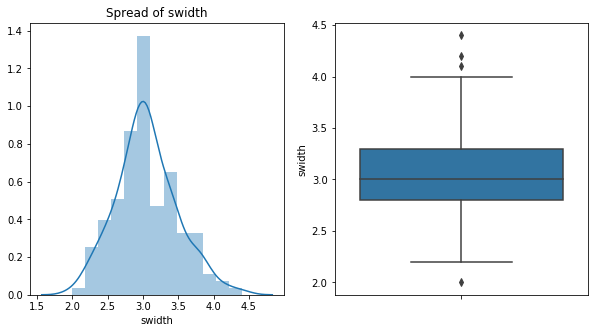

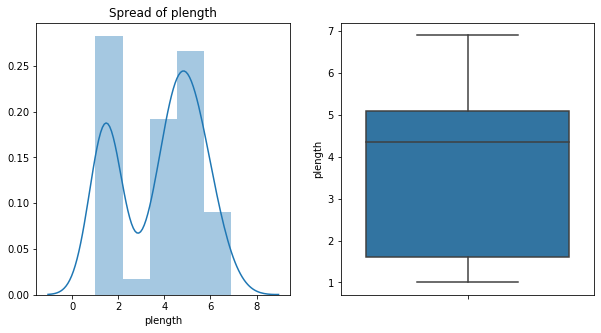

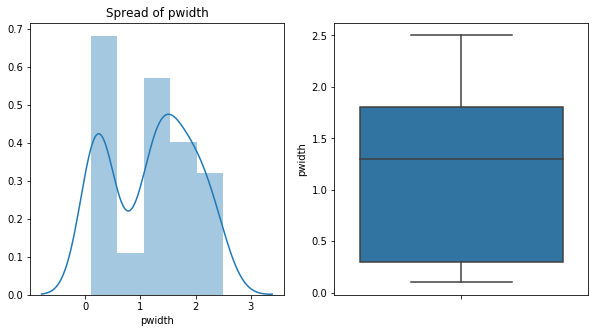

In [11]:
def distplot(df,x):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[x])
    plt.title('Spread of '+x)
    plt.subplot(1,2,2)
    sns.boxplot(y=data[x])
    plt.show()

for column in data_column:
    distplot(data,column)

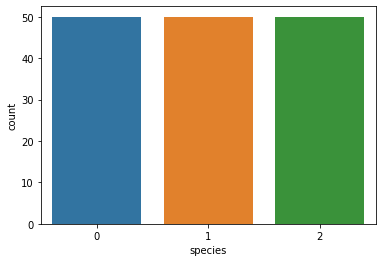

In [12]:
sns.countplot(data.species)

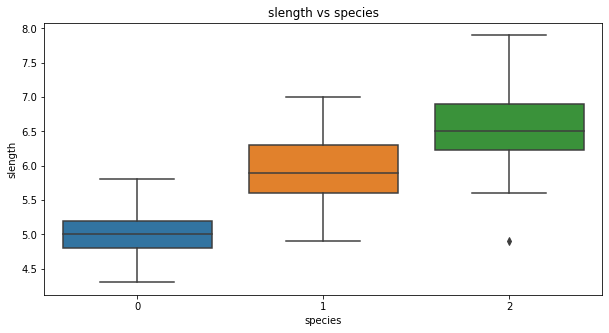

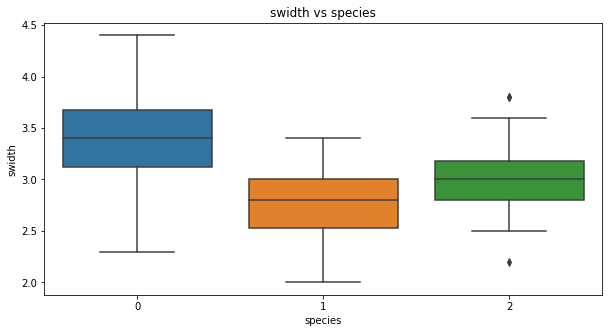

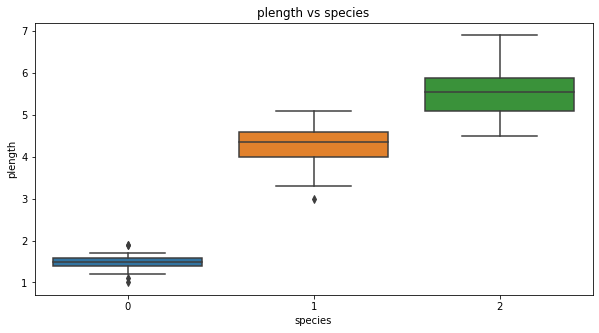

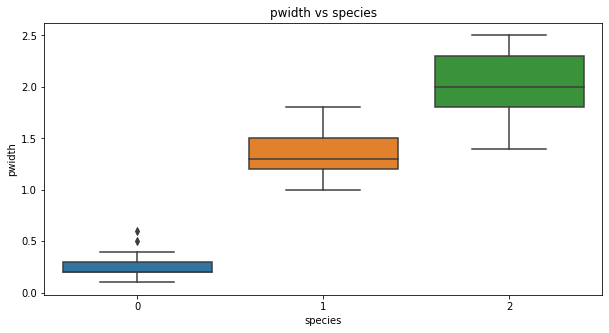

In [13]:
def boxplot(df,x):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df['species'],y=df[x])
    plt.title(x+' vs species')
    plt.show()

for column in data_column:
    boxplot(data,column)

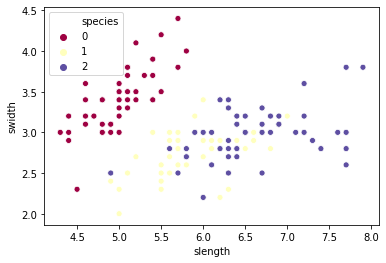

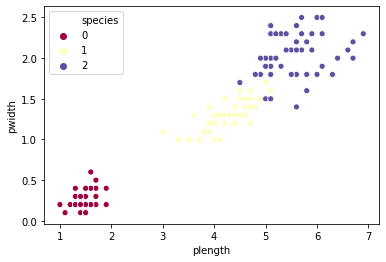

In [14]:
sns.scatterplot(x=data.slength,y=data.swidth,hue=data.species,palette='Spectral')
plt.show()
sns.scatterplot(x=data.plength,y=data.pwidth,hue=data.species,palette='Spectral')

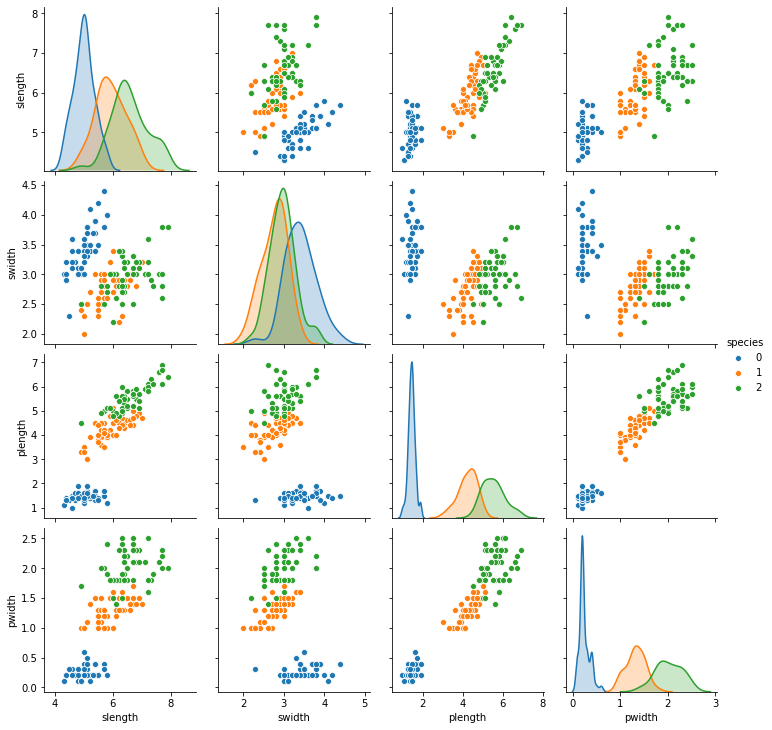

In [15]:
sns.pairplot(data,hue='species')

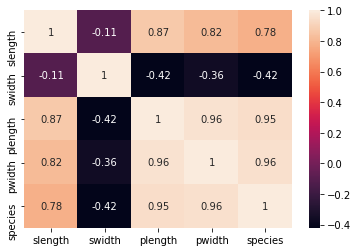

In [16]:
sns.heatmap(data.corr(),annot=True)

# Logistic Regression Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,classification_report,plot_confusion_matrix,plot_roc_curve


In [18]:
X = data[['slength','swidth','plength','pwidth']]
y = data['species']
X_train,X_test,y_train,y_test = train_test_split(X,y)

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print("Training Score: ",logr.score(X_train,y_train))
print("Testing Score: ",logr.score(X_test,y_test))

print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))


Training Score:  0.9553571428571429
Testing Score:  1.0
Confusion Matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



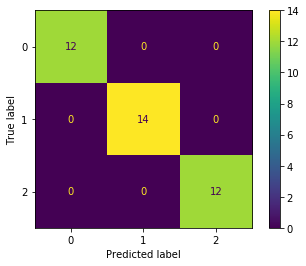

In [19]:
plot_confusion_matrix(logr,X_test,y_test)

# Random  Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Predict using model
y_pred_rf = rf.predict(X_test)
print("ACcuracy: ",accuracy_score(y_test, y_pred_rf))


ACcuracy:  1.0


## Logistic Regression (One vs All Method)

In [21]:
X = np.array(X)
y = np.array(y).reshape(-1,1)


In [22]:
def hypothesis(X,theta):
    z = np.dot(X,theta)
    hx = 1/(1+np.exp(-z))
    return hx

In [23]:
def costfunction(theta,X,y,lambd):
    m,n = X.shape
    theta = theta.reshape((n,1))
    hx = hypothesis(X,theta)
    j = (-1/m)*np.sum((y*np.log(hx))+(1-y)*np.log(1-hx)) + (lambd/(2*m) *np.sum(theta[1:]**2))
    return j

In [24]:
def gradient(theta,X,y,lambd):
    m,n = X.shape
    theta = theta.reshape((n,1))
    hx = hypothesis(X,theta)
    grad = np.zeros_like(theta)
    
    grad[0] = 1/m * (X.T.dot((hx-y)))[0]
    grad[1:] = 1/m * (X.T.dot((hx-y))[1:]) + lambd/m * theta[1:]
    
    return grad

## One vs All classification

In [25]:
X = np.c_[np.ones_like(y),X]

In [26]:

classes = set(y.flatten())
lambd = 1
m,n = X.shape
theta_all = []
X.shape

(150, 5)

In [27]:
from scipy import optimize as opt

In [28]:
for i in range(len(classes)):
    y_new = np.array(y==i).astype(int)
    theta_initial = np.array(np.zeros(n))
    theta,nf,rc = opt.fmin_tnc(func=costfunction,x0=theta_initial,fprime=gradient,args=(X,y_new,lambd))
    theta_all.append(theta)
theta_all = np.array(theta_all)
print(theta_all.shape)

(3, 5)


### One vs all Prediction

In [29]:
def prediction(X,theta):
    n = len(X)
    X = X.reshape((1,n))
    theta = theta.reshape((n,1))
    z=X.dot(theta)
    hx = 1/(1+np.exp(-z))
    return(hx)

In [30]:

predict = []
for i in range(m):
    probability  = []
    for j in range(len(classes)) :
        pred = prediction(X[i],theta_all[j])
        probability.append(pred)
    label = probability.index(max(probability))
    predict.append(label)
predict = np.array(predict).reshape((m,1))

In [31]:
accuracy = np.mean(predict==y)*100
accuracy

95.33333333333334

In [32]:
y_dataframe = pd.DataFrame(y,columns=['Y_True'])

In [33]:
pred = pd.DataFrame(predict,columns=['Predicted'])

In [34]:
pred = pd.concat([y_dataframe,pred],axis=1)

In [35]:
x = X[pred[pred['Y_True']!=pred['Predicted']].index][:,1]
y =  X[pred[pred['Y_True']!=pred['Predicted']].index][:,2]

Text(0.5, 1.0, 'Points which are not predicted correctly')

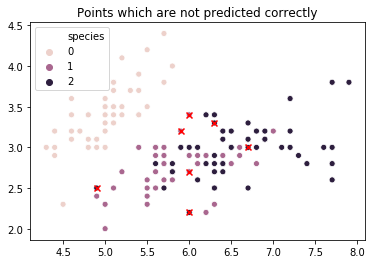

In [36]:
sns.scatterplot(X[:,1],X[:,2],hue=data.species)
plt.scatter(x,y,c='r',marker='x')
plt.title('Points which are not predicted correctly')